# Gráficos base de datos de sismos año 2021

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
        
from datetime import datetime

In [49]:
datos=pd.read_csv('datos.txt', sep='\t')
datos.head()

,year,month,day,hour,min,sec,rloc,lat,lon,depth,age,nsta,rms,mag
0,2021,1,1,9,24,4.8,R,6.796,-73.113,166.7,FUN,9,0.5,3.5
1,2021,1,1,20,28,34.6,L,8.383,-71.303,8.8,FUN,4,0.5,2.9
2,2021,1,2,3,3,15.0,R,10.189,-61.899,52.1,FUN,4,0.3,3.1
3,2021,1,2,5,21,10.6,L,7.014,-71.970,6.4,FUN,5,0.2,3.0
4,2021,1,2,13,12,10.6,L,10.431,-69.074,7.6,FUN,4,0.5,2.3


Crea una columna con tiempo origen del sismo en formato **yyyy-mm-dd HH:MM:SS.sss**

In [120]:
# Crea la columna con los segundos decimales en microsegundos
datos['microsec']=(1e6*(datos.sec-datos.sec.astype(int))).astype(int) 
# Convierte los segundos a entero
datos['sec']=datos.sec.astype(int)
datos.head()

,year,month,day,hour,min,sec,rloc,lat,lon,depth,age,nsta,rms,mag,microsec,Tiempo Origen
0,2021,1,1,9,24,4,R,6.796,-73.113,166.7,FUN,9,0.5,3.5,0,2021-01-01 09:24:04.799
1,2021,1,1,20,28,34,L,8.383,-71.303,8.8,FUN,4,0.5,2.9,0,2021-01-01 20:28:34.600
2,2021,1,2,3,3,15,R,10.189,-61.899,52.1,FUN,4,0.3,3.1,0,2021-01-02 03:03:15.000
3,2021,1,2,5,21,10,L,7.014,-71.970,6.4,FUN,5,0.2,3.0,0,2021-01-02 05:21:10.599
4,2021,1,2,13,12,10,L,10.431,-69.074,7.6,FUN,4,0.5,2.3,0,2021-01-02 13:12:10.599


In [132]:
# Se usa la función conver2date para convertir los string a formato tiempo
def convert2date(row):
    return(datetime(row[0],row[1], row[2], row[3], row[4], row[5], row[6]).
                               strftime('%Y-%m-%d %H:%M:%S.%f'))

#columnas que se usarn para crear la columna tiempo origen
row=['year','month','day','hour','min','sec','microsec']

#usamos el metodo apply para aplicar la función a cada fila del dataframe datos
datos['Tiempo Origen'] = (datos[row].apply(convert2date,axis=1)
                            .astype("datetime64[ms]"))

#Se crea un dataframe con la información que se necesita 
#(tiempo, lat, lon, depth, mag) luego se cambian los nombres
df=(datos[['Tiempo Origen', 'lat','lon','depth','mag']]
        .rename(columns={'lat':'Latitud',
                         'lon':'Longitud',
                         'depth':'Profundidad', 
                         'mag':'Magnitud'}))

df.head()

,Tiempo Origen,Latitud,Longitud,Profundidad,Magnitud
0,2021-01-01 09:24:04,6.796,-73.113,166.7,3.5
1,2021-01-01 20:28:34,8.383,-71.303,8.8,2.9
2,2021-01-02 03:03:15,10.189,-61.899,52.1,3.1
3,2021-01-02 05:21:10,7.014,-71.970,6.4,3.0
4,2021-01-02 13:12:10,10.431,-69.074,7.6,2.3


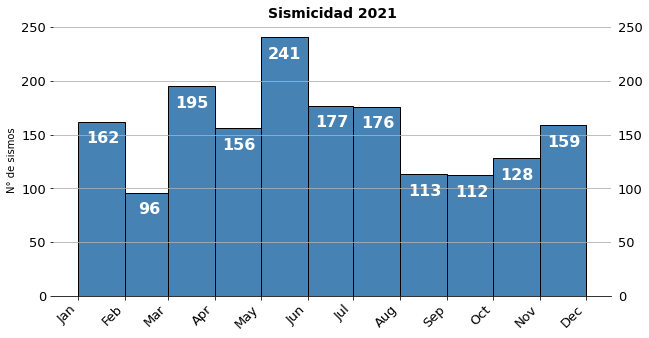

In [126]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(1,1, figsize=(10,5))

#bins para el histograma
bins=np.arange('2021-01-01', '2022-01-31', dtype='datetime64[M]')

histo=ax.hist(datos['Tiempo Origen'], bins=bins, 
              rwidth=1.0 ,color='steelblue', edgecolor='k')

for n, h in enumerate(histo[0]):
    if histo[0][n]>0:
        ax.text(histo[1][n]+16,histo[0][n]-20.0,str(int(histo[0][n])),
                ha='center',fontsize=16, color='white', fontweight='bold')

#Se da formato al grafico eliminando lineas superior derecha e izquierda
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(True)

ax.xaxis.set_major_formatter(mdates.DateFormatter("%b"))
for label in ax.get_xticklabels(which='major'):
    label.set(rotation=45, horizontalalignment='right')

ax.tick_params(labelsize=13, labelright=True)
ax.set_ylabel('N° de sismos')
ax.set_title('Sismicidad 2021',fontsize=14,weight='bold');
ax.set_xticks(np.arange('2021-01-01', '2022-01-31', dtype='datetime64[M]'))


fig.savefig('sismicida_mensual.png')

# Barplot con número de sismos por semana


In [133]:
df_week=pd.DataFrame({'numero':df['Tiempo Origen']
                      .groupby(df["Tiempo Origen"].dt.isocalendar().week).count()})
df_week.reset_index(inplace=True)
df_week.head()

,week,numero
0,1,37
1,2,42
2,3,39
3,4,34
4,5,25


In [134]:
def format_grafico(axn,labelx,labely):
    #Funcion para dar algunos formatos al grafico
    #Entrada: axes (axn),etiqueta eje x (labelx), etiqueta eje y (labely)
    axn.spines['top'].set_visible(False)
    axn.spines['right'].set_visible(False)
    axn.spines['left'].set_visible(False)
    axn.tick_params(labelsize=10, labelright=True)
    axn.yaxis.grid(True)
    
    axn.set_xlabel(labelx, fontsize=16, fontweight='bold')
    axn.set_ylabel(labely, fontsize=16, fontweight='bold')

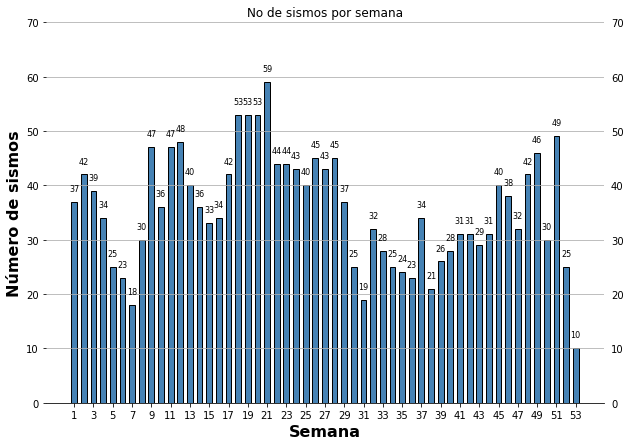

In [127]:
fig, ax=plt.subplots(1,1,figsize=(10,7))

bars=ax.bar(df_week['week'],df_week['numero'],edgecolor='k',color='steelblue',width=0.6)
#bars2=ax.bar(df_week['week']+0.25,df_week['acumulado'],edgecolor='k',color='gray',width=0.5,alpha=0.5)
for bar in bars:
    ax.text(bar.get_x()+bar.get_width()/2, bar.get_height()+2, str(int(bar.get_height())),ha='center', color='k', 
            fontsize=8)
ax.set_xticks(np.arange(1,54,2))
ax.set_ylim(0,70)
ax.set_title('No de sismos por semana')
format_grafico(ax,'Semana','Número de sismos')

plt.savefig('sismos_semanales.png', dpi=120)